## Import the packages

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# import the data

df = pd.read_csv('laptop_data.csv')

df

Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 12 columns]

In [141]:
# check the info of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


1. There are no null values in the data.
2. Only two nmerical columns in the data 'Inches' and 'Price'.
3. The weight column should be a numerical column.
4. The Ram column should also be a numerical column.
5. 'Comapany', 'TypeName','OPSys' are categorical columns.
6. Rest of the columns contain string data.

In [143]:
# check for duplicate columns

df.duplicated().sum()

0

- There are no duplicated columns in the data.

In [9]:
# Delete the redundant index column

df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
# check the details of the numerical columns

df.describe()

Inches          Price
count  1303.000000    1303.000000
mean     15.017191   59870.042910
std       1.426304   37243.201786
min      10.100000    9270.720000
25%      14.000000   31914.720000
50%      15.600000   52054.560000
75%      15.600000   79274.246400
max      18.400000  324954.720000

1. The laptop size ranges from 10 inches to 18.5 inches. 
2. Most of the laptops are in the range of 15.6 inches
3. The average price range of laptops is around 60,000.

In [11]:
# columns in the data frame

df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [74]:
# round the price column to 2 decimal places

df['Price'] = df['Price'].round(2)

In [12]:
# shape of the data frame

df.shape

(1303, 11)

In [13]:
# check for missing values 
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**There are no missing values in the data**

### Company Column

In [14]:
# different companies of laptop available

print('The number of laptop producers are:', df["Company"].nunique())

print('The name of producers of laptop are', df['Company'].unique())

print('*' * 100)

df['Company'].value_counts()

The number of laptop producers are: 19
The name of producers of laptop are ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
****************************************************************************************************


Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

### Brand name price comparison

In [75]:
# price comparison of different manufacturers

company_grp = df.groupby(by='Company')

company_func = company_grp['Price'].aggregate(func=['mean','median','count']).apply(lambda x : np.round(x,decimals=2)).sort_values('mean',ascending=False)

company_func

mean     median  count
Company                               
Razer      178282.49  154458.72      7
LG         111834.72  111834.72      3
MSI         92116.23   85194.72     54
Google      89386.08   83063.52      3
Microsoft   85903.79   83622.96      6
Apple       83340.50   71378.68     21
Huawei      75870.72   75870.72      2
Samsung     75308.32   87858.72      9
Toshiba     67549.05   64548.72     48
Dell        63193.76   52480.80    297
Xiaomi      60390.88   58578.70      4
Asus        58830.14   53946.00    158
Lenovo      57882.56   47898.72    297
HP          56891.04   51495.12    274
Fujitsu     38841.12   39373.92      3
Acer        33394.62   29783.52    103
Chuwi       16745.73   13261.39      3
Mediacom    15717.60   14119.20      7
Vero        11584.40   11020.96      4

- Razer and LG have products more focussed on the higher end of the market.
- Asus and lenovo produces more budget segment laptops.
- Many of the lesser name chinese brands have more products in the lower segment of the market.

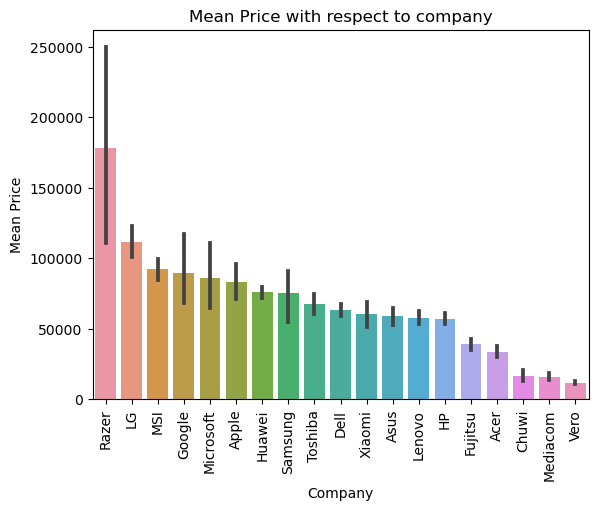

In [16]:
sns.barplot(x='Company',y='Price',data=df,estimator=np.mean,order=company_func.index)
plt.xticks(rotation=90)
plt.title('Mean Price with respect to company')
plt.ylabel('Mean Price')
plt.show()

### Laptops Types:

In [17]:
# check the different types of laptops

df['TypeName'].value_counts()

type_grp = df.groupby(by='TypeName')['Price'].aggregate(func=['mean','median'])

type_grp.sort_values('mean',ascending=False).apply(lambda x :np.round(x,decimals=2))

mean     median
TypeName                                
Workstation         121497.53  110017.87
Gaming               92247.96   79536.38
Ultrabook            82489.71   79866.72
2 in 1 Convertible   68326.36   63882.72
Notebook             41669.15   36816.48
Netbook              33898.44   18115.20

In [18]:
# create a new segment column

def type_high_seg(x):
    if (x == 'Workstation') or (x == 'Gaming') or (x == 'Ultrabook'):
        return 'Yes'
    else:
        return 'No'
    
df['High_segment'] = df['TypeName'].apply(type_high_seg)

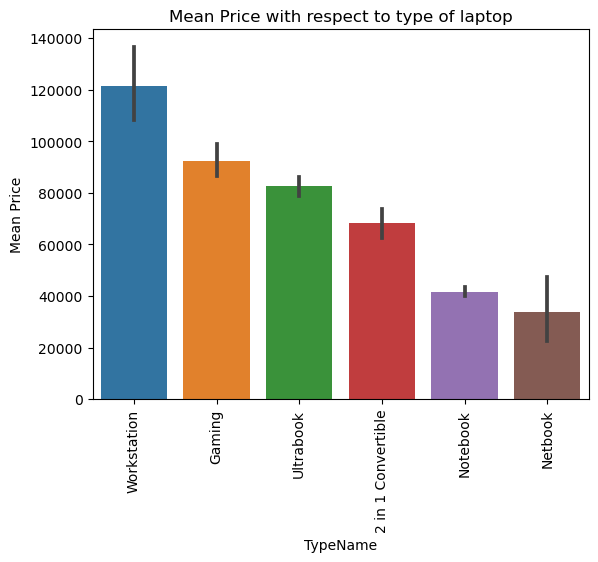

In [19]:
sns.barplot(x='TypeName',y='Price',data=df,estimator=np.mean,order=type_grp.sort_values(by='mean',ascending=False).index)
plt.xticks(rotation=90)
plt.title('Mean Price with respect to type of laptop')
plt.ylabel('Mean Price')
plt.show()

- Workstation laptops are the most expensive may be due to the hardware specs.
- Gaming laptops come second due to presence of better GPU's in them.
- Netbooks are the cheapest because they might be supporting low end hardware
- Ultrabooks are more expensive in comparison to 2 in 1 because of the thin profile.
- Notebooks are the most general section of laptops in the market.

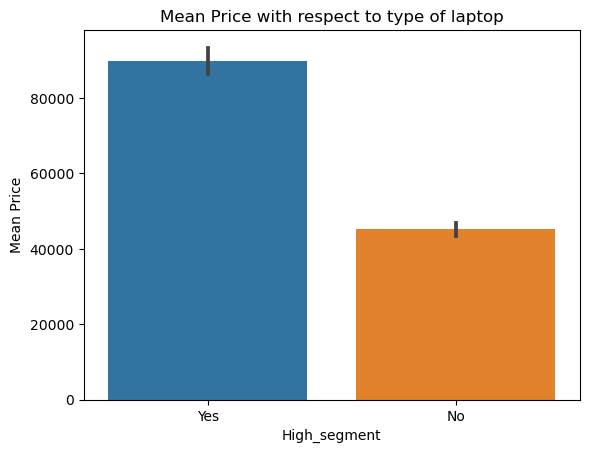

In [20]:
# mean price comparison of the high segment of laptops with the low segment

sns.barplot(x='High_segment',y='Price',data=df,estimator=np.mean,order=['Yes','No'])
plt.title('Mean Price with respect to type of laptop')
plt.ylabel('Mean Price')
plt.show()

### Laptop Screen size

In [21]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
High_segment         object
dtype: object

<AxesSubplot: xlabel='Price', ylabel='Density'>

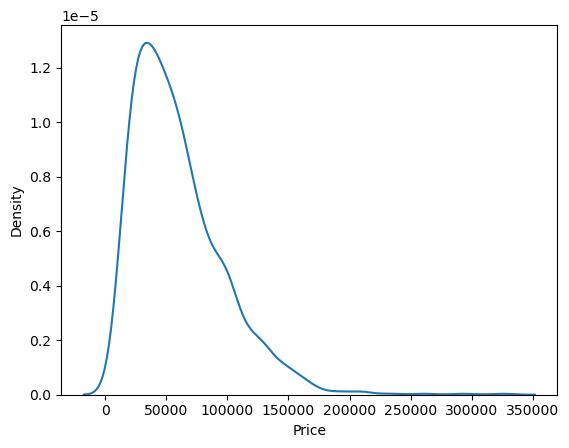

In [76]:
# Price distribution of laptops

sns.kdeplot(x='Price',data=df)

The price distribution of the laptops shows that the distribution is skewed towards the right which means that there are many laptops in the price segment upto Rs.1,50,000 and then the expensive laptops are there but are lower in number.

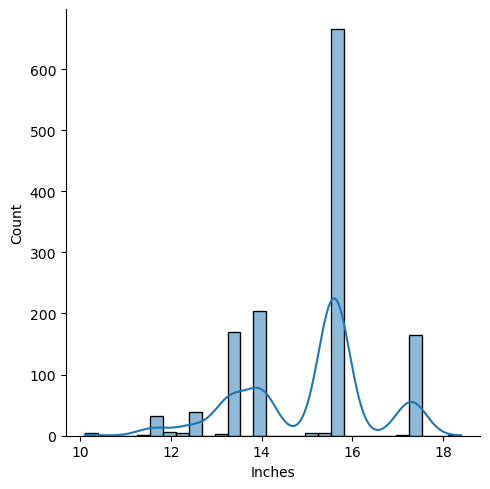

In [23]:
# inches of the laptop

sns.displot(x='Inches',data=df,kde='True')

The graph is trimodal in nature.     

Screen size of 13.5 inches, 15 inches and around 17 inches are prevalent.  

Some laptops are also available in screen sizes round and smaller than 10 inches and some larger than 18 inches are also available.

In [24]:
# screen size value counts

df['Inches'].value_counts().sort_values(ascending=False).nlargest(5)

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
Name: Inches, dtype: int64

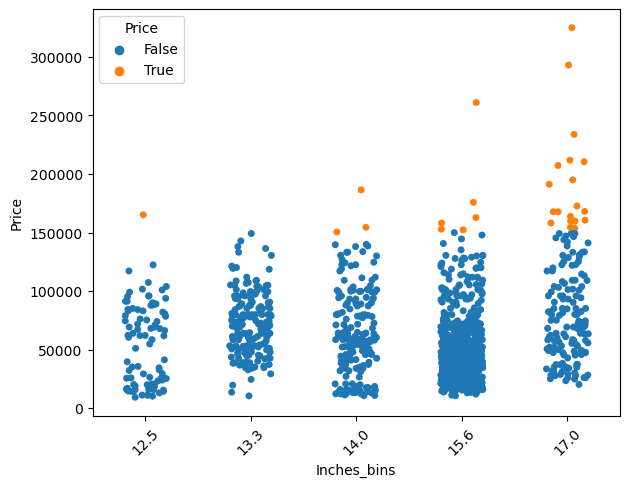

In [25]:
# screen size and price relationship

bins = [10,13,14,15,17,19]
labels = [12.5,13.3,14,15.6,17]
df['Inches_bins'] = pd.cut(df["Inches"],bins,right=False,include_lowest=True,labels=labels)

sns.stripplot(x='Inches_bins',y='Price',data=df,jitter=0.2,hue=df['Price']>150000)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- The bigger screen size the laptop has, the more expensive it is.
- The High segment category is more in number in larger laptops as compared to laptops having smaller screen size.

In [26]:
df.dtypes

Company               object
TypeName              object
Inches               float64
ScreenResolution      object
Cpu                   object
Ram                   object
Memory                object
Gpu                   object
OpSys                 object
Weight                object
Price                float64
High_segment          object
Inches_bins         category
dtype: object

<AxesSubplot: xlabel='Inches_bins', ylabel='Count'>

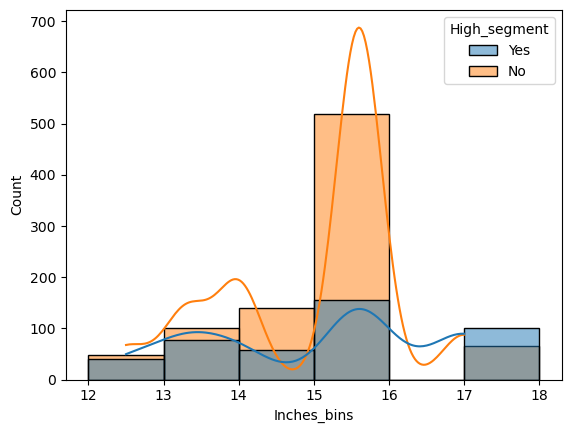

In [27]:
# Distribution of laptops based on screen size

sns.histplot(x='Inches_bins',data=df,hue='High_segment',bins=labels,multiple='layer',kde=True)

- The larger screen size laptops are more high end as compared to smaller sizes and more of these laptops are form the High segment.
- Lower screen sizes have lesser number of high end laptops.


<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

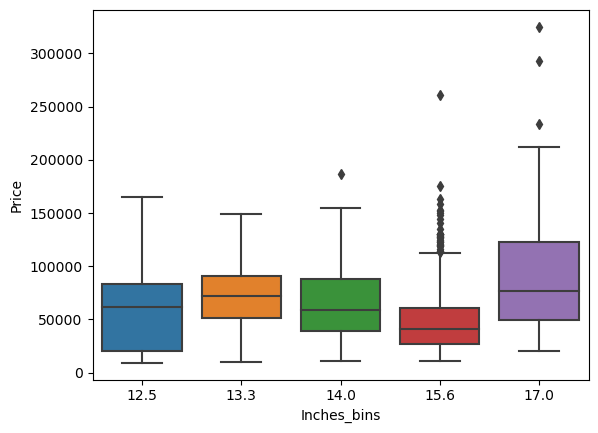

In [28]:
# plot box plots to check for outliers

sns.boxplot(x='Inches_bins',y='Price',data=df)

There are many expensive laptops in the 15 inch segment    
The 17 inch segment market is generally having expensive expensive products, but 3 products in the 17 inch segment seems to be outliers for their current segment.

In [29]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'High_segment',
       'Inches_bins'],
      dtype='object')

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

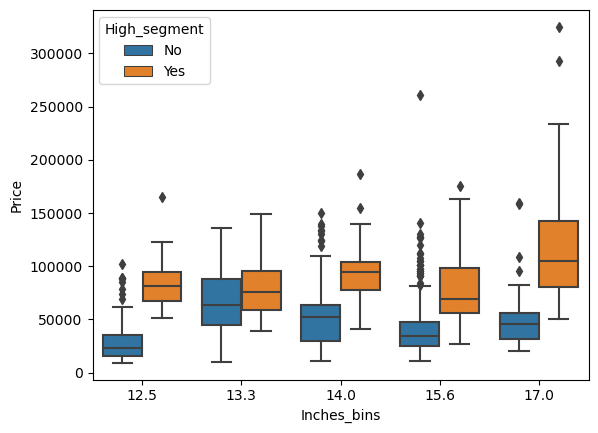

In [30]:
# check for types of laptops wrt to their screen size

sns.boxplot(x='Inches_bins',y='Price',data=df,hue='High_segment',hue_order=['No','Yes'])

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

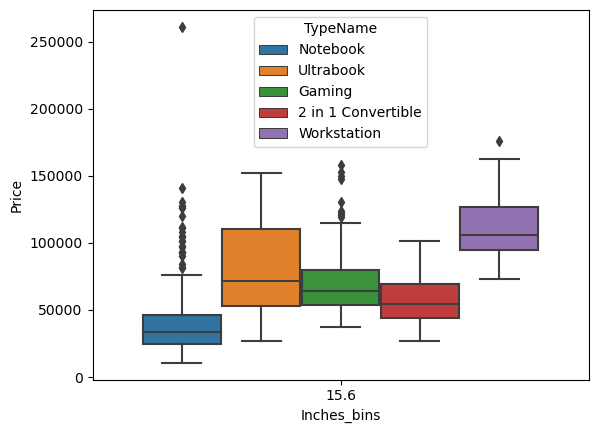

In [31]:
# outliers based on type of laptop in the 15.6 inches screen size

df_15_inch = df[df['Inches_bins'] == 15.6].copy()
df_15_inch

sns.boxplot(x='Inches_bins',y='Price',data=df_15_inch,hue='TypeName',order=[15.6])

In [32]:
df['Inches_bins'].value_counts().sort_index()

12.5     88
13.3    178
14.0    198
15.6    673
17.0    166
Name: Inches_bins, dtype: int64

In [33]:
labels

[12.5, 13.3, 14, 15.6, 17]

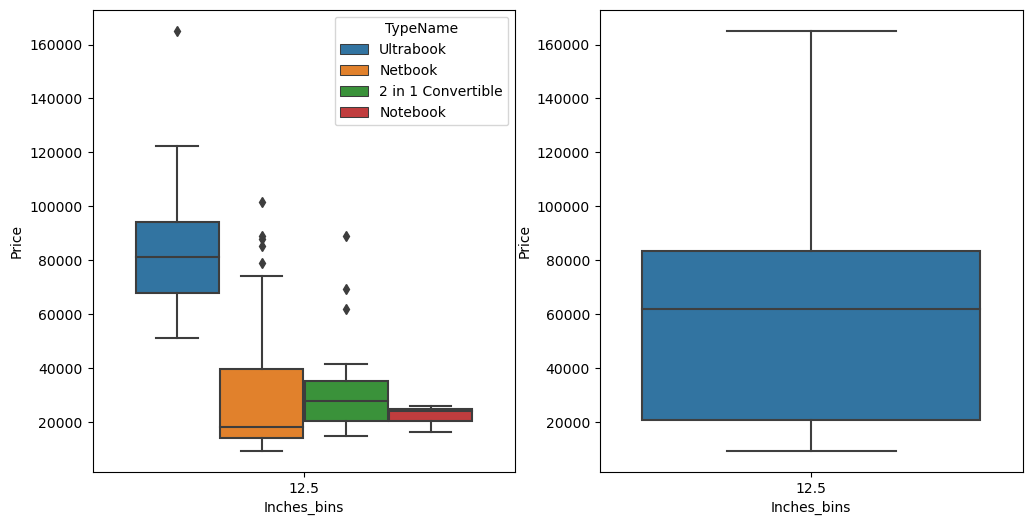

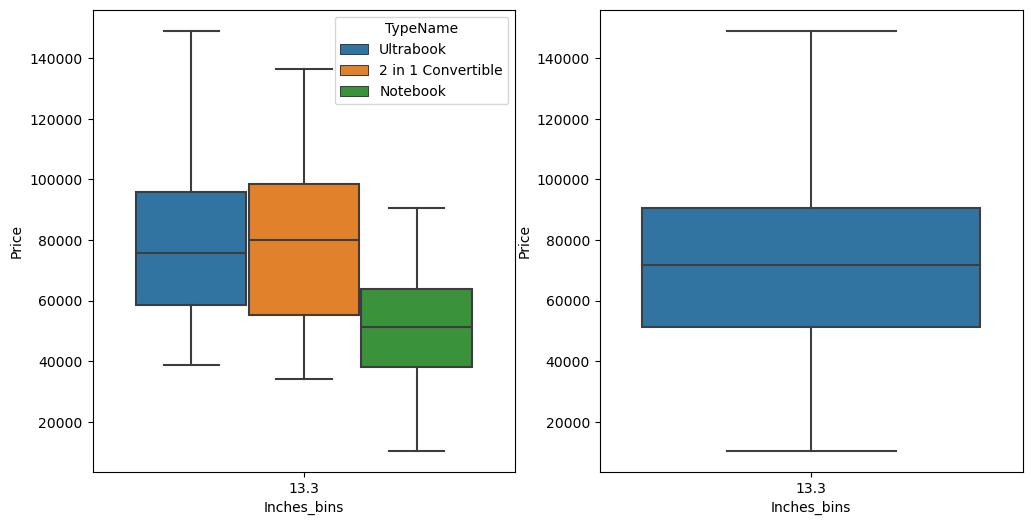

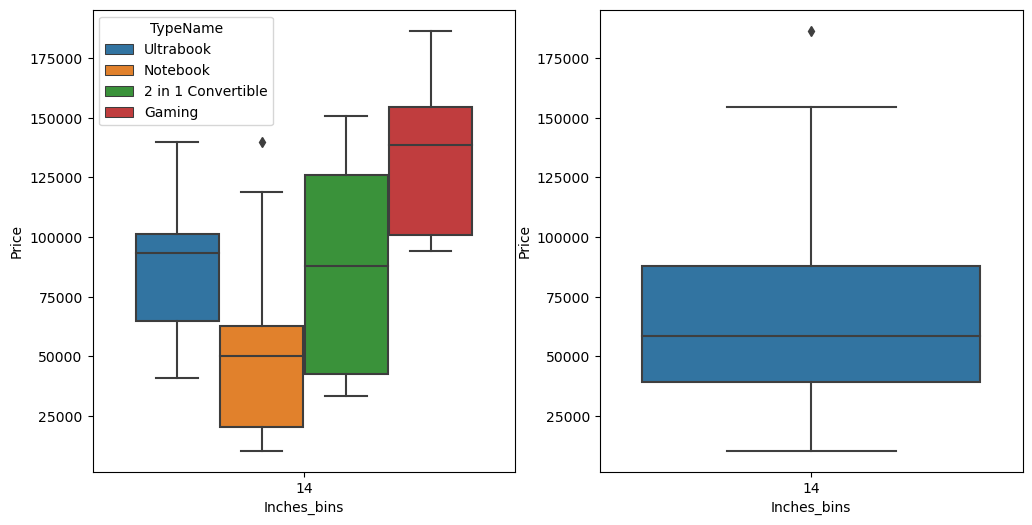

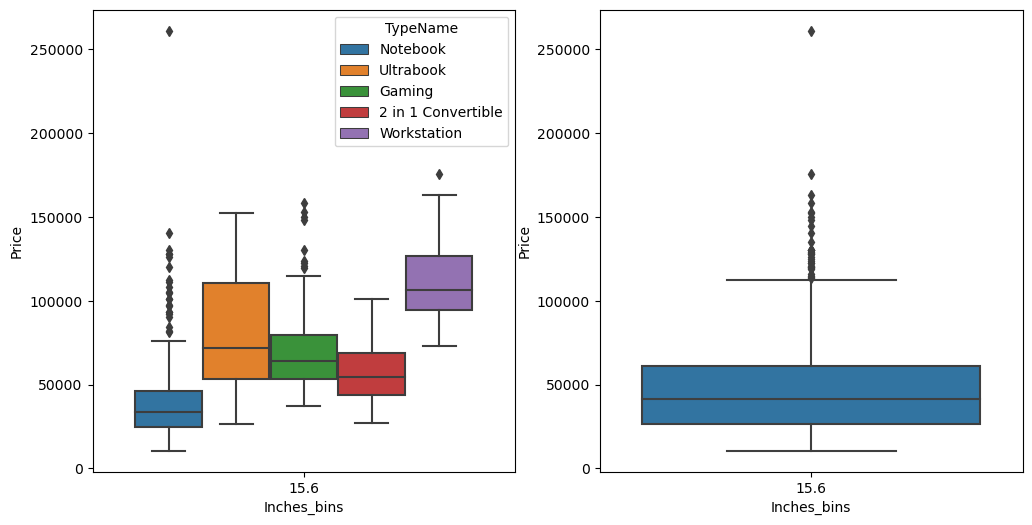

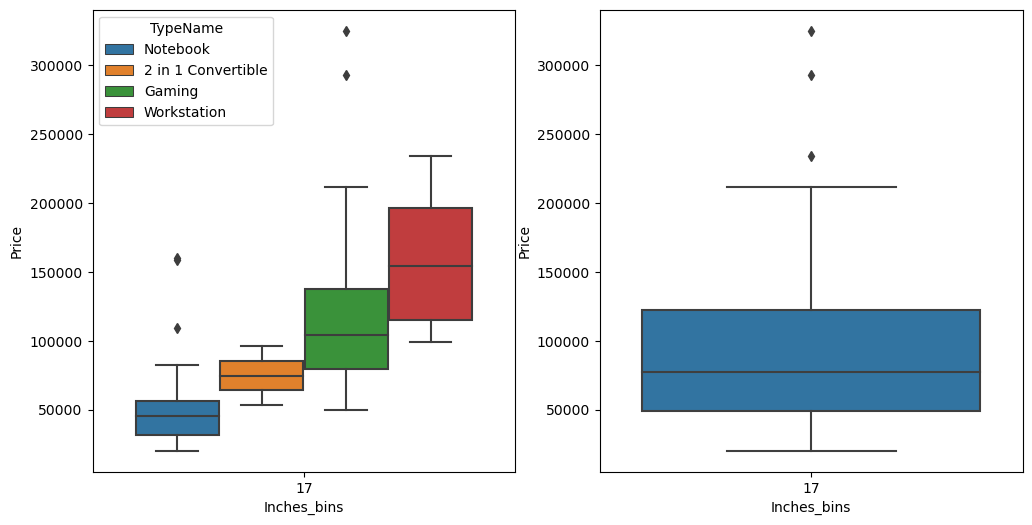

In [34]:
def plot_boxplots(df,bins):
    for l in bins:
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        df_filter = df[df['Inches_bins'] == l]
        sns.boxplot(x='Inches_bins',y='Price',data=df_filter,hue='TypeName',order=[l])
        
        plt.subplot(1,2,2)
        sns.boxplot(x='Inches_bins',y='Price',data=df_filter,order=[l])

        
plot_boxplots(df,labels)

- Many laptops in the Notebook and Gaming laptops category have a higher price then the rest.
- The workstation laptops already have a highe price as compared to other laptops in the same screen size.
- The 15.6 and the 17 inch segment laptops have some data points aas extreme outliers in them.

This might be due to presence or absence of high end GPU's in the laptop or can be due to other powerful hardware present.

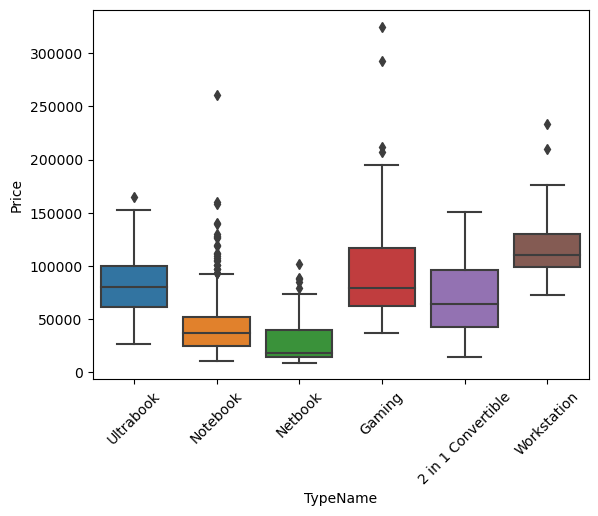

In [35]:
# check for outliers by Type of the laptop

sns.boxplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

##### Extreme outliers in the data

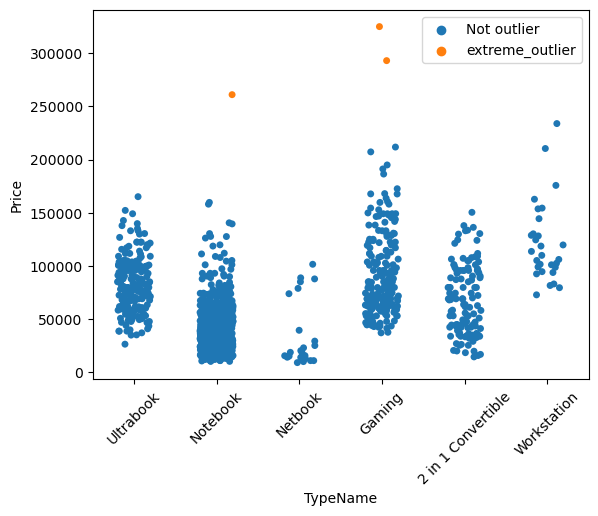

In [36]:
# check for the extreme outliers in the data
df_extreme_outliers = df[df['Price'] >= 250000]
df_extreme_outliers

sns.stripplot(x='TypeName',y='Price',data=df,hue=np.where(df['Price'] >= 250000,'extreme_outlier','Not outlier'),jitter=0.2)
plt.xticks(rotation=45)
plt.show()

- In the later stages we can remove these extreme outleirs.
- The other outliers can be capped through the winsorization method.

We may have to consider removing these outliers from our data as they are extreme outliers and can effect our pedictions

In [53]:
# Percantage of extreme outlers data points vs length of df

percentage_outliers = (df_extreme_outliers.shape[0] / df.shape[0]) * 100
percentage_outliers

0.23023791250959325

The percentage of extreme outleirs is very less and it is better to remove these data points as they will affect our analysis.

In [57]:
# outliers to be capped

def mark_outliers(group):
    upper_limit = group['Price'].quantile(0.95)
    group['is_outlier'] = np.where((group['Price'] > upper_limit),1,0)
    return group

outliers = df.groupby('TypeName',group_keys=False).apply(mark_outliers)

In [59]:
# percentage of outlers in the data based on the type of laptop

outliers['is_outlier'].mean() * 100

5.218726016884114

In [66]:
# percentage of outliers in the type category:

outliers.groupby('TypeName')['is_outlier'].mean()*100

TypeName
2 in 1 Convertible    4.958678
Gaming                5.365854
Netbook               8.000000
Notebook              5.089409
Ultrabook             5.102041
Workstation           6.896552
Name: is_outlier, dtype: float64

- On an average around 5 to 6% of the data points in every type category is an outlier. Removal of these data points will result in huge data loss.
- One way to do is to cap the higher prices but it will also result in the removal of high price laptops.

##### **Conclusion**     
The best approach for such data types is to leave them as it is and only remove the ones that are very extreme and can actually disturn the analysis.
Another best approach would be to use models that are somewhat robust to outliers as it might give us good results.

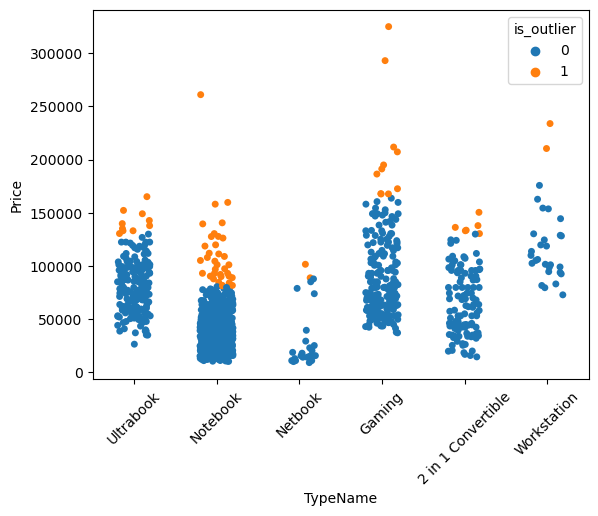

In [39]:
# check for the outliers in the data above the 95th percentile

sns.stripplot(x='TypeName',y='Price',data=df,hue=outliers,jitter=0.2)
plt.xticks(rotation=45)
plt.show()

In [41]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price High_segment  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832          Yes   
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232          Yes   
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000           No   
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360          Yes   
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080          Yes   

  Inches_bins  
0        13.3  
1        13.3  
2        15.6  
3        15.6  
4        13.3

### Screen resolution

In [67]:
# Screen resolutions of high priced laptops

df[['TypeName','ScreenResolution',"Price"]].sort_values(by='Price',ascending=False).head(10)

TypeName                     ScreenResolution       Price
196        Gaming  4K Ultra HD / Touchscreen 3840x2160  324954.720
830        Gaming  4K Ultra HD / Touchscreen 3840x2160  292986.720
610      Notebook      IPS Panel 4K Ultra HD 3840x2160  261018.720
749   Workstation          IPS Panel Full HD 1920x1080  233845.920
1066       Gaming          IPS Panel Full HD 1920x1080  211788.000
1136  Workstation          IPS Panel Full HD 1920x1080  210424.032
238        Gaming                    Full HD 1920x1080  207259.200
723        Gaming                4K Ultra HD 3840x2160  194972.832
780        Gaming          IPS Panel Full HD 1920x1080  191211.264
1231       Gaming                    Full HD 1920x1080  186426.720

In [68]:
# Screen resolutions opf lower priced laptops.

df[['TypeName','ScreenResolution',"Price"]].sort_values(by='Price',ascending=False).tail(10)

TypeName   ScreenResolution      Price
1102  Notebook           1366x768  11135.520
1282   Netbook           1366x768  11135.520
1296   Netbook           1366x768  11135.520
1268   Netbook           1366x768  11135.520
791   Notebook          1920x1080  10810.512
290   Notebook           1366x768  10602.720
31    Notebook           1366x768  10602.720
1120  Notebook  Full HD 1920x1080  10442.880
20     Netbook           1366x768  10224.432
1215   Netbook           1366x768   9270.720

In [77]:
# screen resolutions column value counts

df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [86]:
# Extract screen resolution info

import re

def sep_resolution(text):
    pattern = re.compile('\d{3,}')
    resolution = pattern.findall(text)
    return resolution

df['Horizontal_resolution'] = df['ScreenResolution'].apply(sep_resolution).str.get(0)
df['Vertical_resolution'] = df['ScreenResolution'].apply(sep_resolution).str.get(1)

In [87]:
df.dtypes

Company                    object
TypeName                   object
Inches                    float64
ScreenResolution           object
Cpu                        object
Ram                        object
Memory                     object
Gpu                        object
OpSys                      object
Weight                     object
Price                     float64
High_segment               object
Inches_bins              category
Horizontal_resolution      object
Vertical_resolution        object
dtype: object

In [89]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight      Price High_segment  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.68          Yes   
1        Intel HD Graphics 6000  macOS  1.34kg   47895.52          Yes   
2         Intel HD Graphics 620  No OS  1.86kg   30636.00           No   
3            AMD Radeon Pro 455  macOS  1.83kg  135195.34          Yes   
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.81          Yes   

  Inches_bins Horizontal_resolution Vertical_resolution  
0        13.3                  2560                1600  
1        13.3                  1440                 900  
2        15.6                  1920                1080  
3        15.6                  2880                1800  
4        13.3                  2560                1600

In [88]:
df[['ScreenResolution','Horizontal_resolution','Vertical_resolution']].sample(30)

ScreenResolution Horizontal_resolution  \
1136                 IPS Panel Full HD 1920x1080                  1920   
486                  IPS Panel Full HD 1920x1080                  1920   
653                            Full HD 1920x1080                  1920   
1024                           Full HD 1920x1080                  1920   
117                  IPS Panel Full HD 1920x1080                  1920   
721               IPS Panel Touchscreen 1366x768                  1366   
707                            Full HD 1920x1080                  1920   
1170                           Full HD 1920x1080                  1920   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800                  3200   
408                            Full HD 1920x1080                  1920   
410                            Full HD 1920x1080                  1920   
228                            Full HD 1920x1080                  1920   
528                            Full HD 1920x1080                  1920   
896                            Full HD 1920x1080                  1920   
1269                                    1366x768                  1366   
1116                 IPS Panel Full HD 1920x1080                  1920   
32                             Full HD 1920x1080                  1920   
752                                     1366x768                  1366   
298                            Full HD 1920x1080                  1920   
1197                 IPS Panel Full HD 1920x1080                  1920   
373                                     1600x900                  1600   
669                                     1366x768                  1366   
757                            Full HD 1920x1080                  1920   
984                                     1366x768                  1366   
546                            Full HD 1920x1080                  1920   
771              Full HD / Touchscreen 1920x1080                  1920   
374              Full HD / Touchscreen 1920x1080                  1920   
156    IPS Panel Full HD / Touchscreen 1920x1080                  1920   
1236                                   2560x1440                  2560   
805                                     1366x768                  1366   

     Vertical_resolution  
1136                1080  
486                 1080  
653                 1080  
1024                1080  
117                 1080  
721                  768  
707                 1080  
1170                1080  
1299                1800  
408                 1080  
410                 1080  
228                 1080  
528                 1080  
896                 1080  
1269                 768  
1116                1080  
32                  1080  
752                  768  
298                 1080  
1197                1080  
373                  900  
669                  768  
757                 1080  
984                  768  
546                 1080  
771                 1080  
374                 1080  
156                 1080  
1236                1440  
805                  768

In [90]:
# convert to numerical columns

df['Horizontal_resolution'] = df['Horizontal_resolution'].astype('int32')
df['Vertical_resolution'] = df['Vertical_resolution'].astype('int32')

In [91]:
df.dtypes

Company                    object
TypeName                   object
Inches                    float64
ScreenResolution           object
Cpu                        object
Ram                        object
Memory                     object
Gpu                        object
OpSys                      object
Weight                     object
Price                     float64
High_segment               object
Inches_bins              category
Horizontal_resolution       int32
Vertical_resolution         int32
dtype: object

In [93]:
# create a new higher resolution displays column
def create_high_definition(number):
    if number >= 1080:
        return True
    else:
        return False
    
df['High_definition'] = df['Vertical_resolution'].apply(create_high_definition)

In [95]:
# do value counts on high_res displays

df['High_definition'].value_counts(normalize=True)

True     0.742901
False    0.257099
Name: High_definition, dtype: float64

<AxesSubplot: xlabel='High_definition', ylabel='count'>

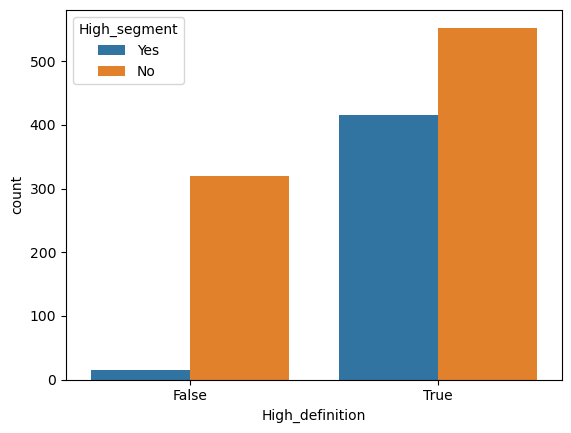

In [97]:
# realtionship between Full HD screens and High segment laptops

sns.countplot(x='High_definition',data=df,hue="High_segment")

##### Conclusions:

Most of the laptops in the high segment support displays having Full HD resolution and some even have displays of high resolutions.    
The laptops that do not support Full HD or higher are mostly from the lower segment. These are from the netbook, notebook type laptops.

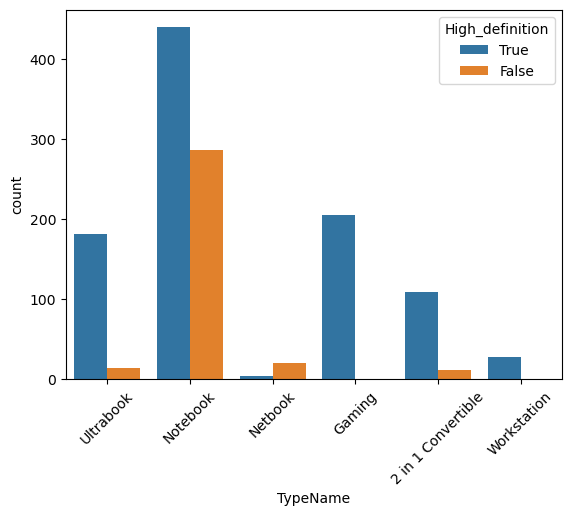

In [100]:
# HD resolution in relation to the type of laptop

sns.countplot(x='TypeName',data=df,hue='High_definition',hue_order=[True,False])
plt.xticks(rotation=45)
plt.show()

- The Ultrabooks and thin and light convertibles have higher ratio of high resolution displays.   
- Netbook segment because it is the cheapest option has very less high resolution displays.
- Gaming laptops have only high resolution displays in them.
- The notebook category has a mixed variety of resolutions.

In [103]:
# screen that are touchscreen

df[df['ScreenResolution'].str.contains('Touchscreen')]['ScreenResolution']

19       IPS Panel Full HD / Touchscreen 1920x1080
23                 Full HD / Touchscreen 1920x1080
33                Touchscreen / Quad HD+ 3200x1800
44                 Full HD / Touchscreen 1920x1080
50                 IPS Panel Touchscreen 1920x1200
                           ...                    
1271    IPS Panel Quad HD+ / Touchscreen 3200x1800
1284     IPS Panel Full HD / Touchscreen 1920x1080
1285    IPS Panel Quad HD+ / Touchscreen 3200x1800
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
Name: ScreenResolution, Length: 192, dtype: object

In [107]:
def has_touchscreen(text):
  if "Touchscreen" in text.split(' '):
    return True
  else:
    return False


In [108]:
# Make touchscreen column

df['Has_touchscreen'] = df['ScreenResolution'].apply(has_touchscreen)

In [109]:
df

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight      Price  \
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.68   
1           Intel HD Graphics 6000       macOS  1.34kg   47895.52   
2            Intel HD Graphics 620       No OS  1.86kg   30636.00   
3               AMD Radeon Pro 455       macOS  1.83kg  135195.34   
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.81   
...                            ...         ...     ...        ...   
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.64   
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.72   
1300             Intel HD Graphics  Windows 10   1.5kg   12201.12   
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.92   
1302             Intel HD Graphics  Windows 10   2.2kg   19660.32   

     High_segment Inches_bins  Horizontal_resolution  Vertical_resolution  \
0             Yes        13.3                   2560                 1600   
1             Yes        13.3                   1440                  900   
2              No        15.6                   1920                 1080   
3             Yes        15.6                   2880                 1800   
4             Yes        13.3                   2560                 1600   
...           ...         ...                    ...                  ...   
1298           No        14.0                   1920                 1080   
1299           No        13.3                   3200                 1800   
1300           No        14.0                   1366                  768   
1301           No        15.6                   1366                  768   
1302           No        15.6                   1366                  768   

      High_definition  Has_touchscreen  
0                True            False  
1               False            False  
2                True            False  
3                True            False  
4              

In [110]:
df[['ScreenResolution','Has_touchscreen']].sample(30)

ScreenResolution  Has_touchscreen
428                    Full HD 1920x1080            False
436                             1366x768            False
882                             1366x768            False
667                    Full HD 1920x1080            False
1045                   Full HD 1920x1080            False
498          IPS Panel Full HD 1920x1080            False
78                     Full HD 1920x1080            False
856                             1366x768            False
404                    Full HD 1920x1080            False
1287                            1366x768            False
735                    Full HD 1920x1080            False
389                Touchscreen 2560x1440             True
18                     Full HD 1920x1080            False
895                    Full HD 1920x1080            False
402          IPS Panel Full HD 1920x1080            False
789                    Full HD 1920x1080            False
181                    Full HD 1920x1080            False
1152                   Full HD 1920x1080            False
273                Touchscreen 2560x1440             True
694          IPS Panel Full HD 1920x1080            False
17    IPS Panel Retina Display 2880x1800            False
397          IPS Panel Full HD 1920x1080            False
704                             1366x768            False
1204                   Full HD 1920x1080            False
857      Full HD / Touchscreen 1920x1080             True
119                    Full HD 1920x1080            False
1231                   Full HD 1920x1080            False
738                    Full HD 1920x1080            False
422                    Full HD 1920x1080            False
1181                   Full HD 1920x1080            False

In [111]:
df['ScreenResolution'].str.contains('Touchscreen').sum()

192

In [112]:
df['Has_touchscreen'].sum()

192

In [113]:
def is_ips(text):
  if 'IPS' in text.split(' '):
    return True
  else:
    return False


In [114]:
# check if the display is IPS

df['Is_IPS'] = df['ScreenResolution'].apply(is_ips)

In [121]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'High_segment',
       'Inches_bins', 'Horizontal_resolution', 'Vertical_resolution',
       'High_definition', 'Has_touchscreen', 'Is_IPS'],
      dtype='object')

In [126]:
# relationship between the price of diff latop types having high definition and having IPS panels.

df.pivot_table(values='Price',index='TypeName',columns=['Is_IPS','High_definition'])

Is_IPS                     False                        True                
High_definition            False          True          False          True 
TypeName                                                                    
2 in 1 Convertible  29841.535556   78037.220638  28497.696667   68478.601452
Gaming                       NaN   92859.862821           NaN   91434.407614
Netbook             23652.767778   89865.600000  21400.800000   87912.000000
Notebook            28257.025442   48141.246049  44462.027500   56580.316847
Ultrabook           64394.453846   84561.674455  58554.720000   83105.828272
Workstation         99153.550000  109155.112353           NaN  142603.435455

- Having a High Definition display has more impact on the price as compared to having an IPS Panel display..

<AxesSubplot: xlabel='TypeName'>

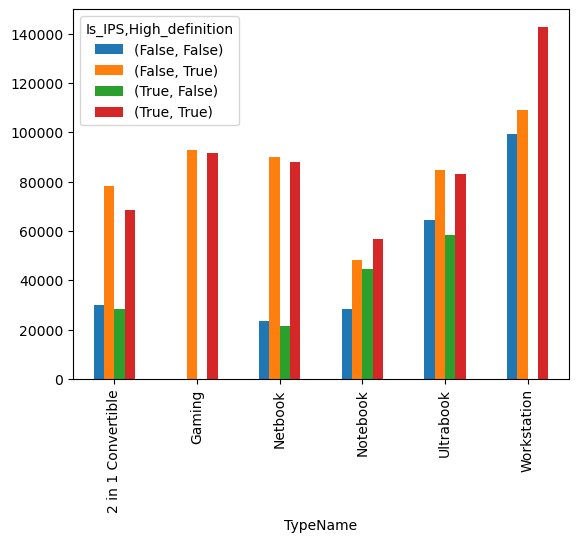

In [123]:
df.pivot_table(values='Price',index='TypeName',columns=['Is_IPS','High_definition']).plot(kind='bar')

### CPU

In [132]:
# Take information out of the CPU column

df['Cpu'].value_counts().sample(50).sort_values(ascending=False)

Intel Core i5 7200U 2.5GHz              190
Intel Core i5 8250U 1.6GHz               72
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Celeron Dual Core N3050 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Core i7 6820HK 2.7GHz              10
Intel Core i3 7130U 2.7GHz                8
Intel Core i7 7Y75 1.3GHz                 5
Intel Atom x5-Z8350 1.44GHz               5
Intel Celeron Quad Core N3450 1.1GHz      5
Intel Core M 6Y30 0.9GHz                  3
AMD Ryzen 1700 3GHz                       3
Intel Core i7 7660U 2.5GHz                3
Intel Celeron Quad Core N3160 1.6GHz      2
AMD E-Series E2-9000e 1.5GHz              2
Intel Core M 1.1GHz                       2
AMD E-Series 7110 1.8GHz        

In [133]:
def cpu_brand(text):
  if ('Intel') in text.split(' '):
    return 'Intel'
  elif "AMD" in text.split(' '):
    return 'AMD'
  else:
    return 'Others'

df['Cpu_Brand'] = df['Cpu'].apply(cpu_brand)

In [134]:
df[['Cpu','Cpu_Brand']].sample(60)

Cpu Cpu_Brand
55              Intel Core i7 8550U 1.8GHz     Intel
346   Intel Celeron Dual Core N3060 1.6GHz     Intel
1014            Intel Core i3 7100U 2.4GHz     Intel
1298            Intel Core i7 6500U 2.5GHz     Intel
1099           Intel Core i7 6700HQ 2.6GHz     Intel
913             Intel Core i7 7500U 2.7GHz     Intel
447            Intel Xeon E3-1505M V6 3GHz     Intel
397             Intel Core i5 7200U 2.5GHz     Intel
1061           Intel Core i7 6700HQ 2.6GHz     Intel
1142            Intel Core i5 6300U 2.4GHz     Intel
673            AMD E-Series E2-9000 2.2GHz       AMD
666             Intel Core i5 7200U 2.5GHz     Intel
802             Intel Core i5 7200U 2.5GHz     Intel
643            Intel Core i7 7700HQ 2.8GHz     Intel
619   Intel Celeron Quad Core N3160 1.6GHz     Intel
51              Intel Core i7 8550U 1.8GHz     Intel
228             Intel Core i5 7200U 2.5GHz     Intel
1103           Intel Core i7 6700HQ 2.6GHz     Intel
34                    Intel Core i5 1.6GHz     Intel
850   Intel Celeron Dual Core N3060 1.6GHz     Intel
839             Intel Core i5 7200U 2.5GHz     Intel
171             Intel Core i5 7200U 2.5GHz     Intel
969             Intel Core i5 7200U 2.5GHz     Intel
61              Intel Core i5 8250U 1.6GHz     Intel
1166            Intel Core i5 7200U 2.5GHz     Intel
893             Intel Core i5 7200U 2.5GHz     Intel
1231           Intel Core i7 7700HQ 2.8GHz     Intel
505             Intel Core i5 7200U 2.5GHz     Intel
1108             AMD A6-Series 9220 2.5GHz       AMD
780            Intel Core i7 7700HQ 2.8GHz     Intel
852             Intel Core i7 7500U 2.7GHz     Intel
1257              Intel Core i3 6006U 2GHz     Intel
740             Intel Core i7 7500U 2.7GHz     Intel
1083            Intel Core i7 7500U 2.7GHz     Intel
102             Intel Core i5 8250U 1.6GHz     Intel
1116           Intel Core i7 6820HK 2.7GHz     Intel
378   Intel Celeron Dual Core N3350 1.1GHz     Intel
853            Intel Core i7 7700HQ 2.8GHz     Intel
1026            Intel Core i5 7200U 2.5GHz     Intel
577            Intel Core i7 6820HK 2.7GHz     Intel
498             Intel Core i3 7100U 2.4GHz     Intel
13                Intel Core i3 6006U 2GHz     Intel
508             Intel Core i7 7500U 2.7GHz     Intel
1156           Intel Core i7 7700HQ 2.8GHz     Intel
277             Intel Core i7 8550U 1.8GHz     Intel
374             Intel Core i7 8550U 1.8GHz     Intel
37              Intel Core i5 8250U 1.6GHz     Intel
391            Intel Core i7 7700HQ 2.8GHz     Intel
157             Intel Core i5 8250U 1.6GHz     Intel
968            Intel Core i7 7700HQ 2.8GHz     Intel
1104           Intel Core i7 7700HQ 2.8GHz     Intel
670             Intel Core i7 7600U 2.8GHz     Intel
918            Intel Core i7 7700HQ 2.8GHz     Intel
524             Intel Core i5 8250U 1.6GHz     Intel
882   Intel Celeron Dual Core N3350 1.1GHz     Intel
1072            Intel Core i5 6200U 2.3GHz     Intel
848             Intel Core i5 7200U 2.5GHz     Intel
460               Intel Core i3 6006U 2GHz     Intel
896            Intel Core i7 7700HQ 2.8GHz     Intel
50             Intel Atom x5-Z8550 1.44GHz     Intel

In [138]:
df['Cpu_Brand'].value_counts()

Intel    1240
AMD        62
Name: Cpu_Brand, dtype: int64

<AxesSubplot: xlabel='Cpu_Brand', ylabel='count'>

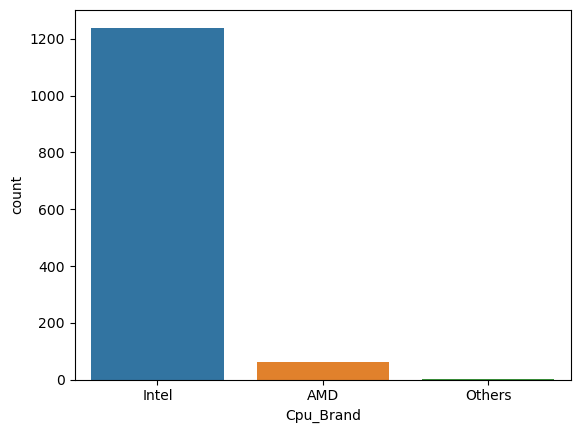

In [135]:
# counts of brands of CPU

sns.countplot(x='Cpu_Brand',data=df)

- Majority of the laptops in the market are of Intel and only a few of them are of AMD.

**As we have only one CPU that is of other brand we can remove this row as this is creating one extra class for only 1 data point and will increase the chances of overfitting.** 
- This 1 data point will also increase the problem of class imbalance in the brand column.

In [136]:
# drop the others cpu brand row

others_index =  df[df['Cpu_Brand'] == 'Others'].index

df.drop(index=others_index,inplace=True)

In [137]:
df['Cpu_Brand'].value_counts()

Intel    1240
AMD        62
Name: Cpu_Brand, dtype: int64

In [ ]:
df['Cpu'].sample(60)

In [144]:
def cpu_model(text):
  cpu_model_pattern = re.compile('i\d{1}')
  if len(cpu_model_pattern.findall(text)) > 0:
    return (cpu_model_pattern.findall(text)[0])
  else:
    return 'Others'

df['Cpu_model'] = df['Cpu'].apply(cpu_model)
df['Cpu_model']

0           i5
1           i5
2           i5
3           i7
4           i5
         ...  
1298        i7
1299        i7
1300    Others
1301        i7
1302    Others
Name: Cpu_model, Length: 1303, dtype: object

In [145]:
df[['Cpu','Cpu_model']].sample(70)

Cpu Cpu_model
319   Intel Pentium Quad Core N3710 1.6GHz    Others
681   Intel Celeron Dual Core N3350 1.1GHz    Others
376   Intel Celeron Quad Core N3450 1.1GHz    Others
110             Intel Core i7 8550U 1.8GHz        i7
1014            Intel Core i3 7100U 2.4GHz        i3
...                                    ...       ...
1244            Intel Core i5 6200U 2.3GHz        i5
671             Intel Core i5 7200U 2.5GHz        i5
403            Intel Core i7 7700HQ 2.8GHz        i7
1226            Intel Core i7 7500U 2.7GHz        i7
683               Intel Core i3 6006U 2GHz        i3

[70 rows x 2 columns]

In [ ]:
def clock_freq(text):
  pattern = re.compile('\d{1,}\.*\d*GHz')

  out = pattern.findall(text)[0]
  return out.replace('GHz','')

df['Cpu_clock_freq'] = df['Cpu'].apply(lambda x: clock_freq(x))


In [ ]:
df[['Cpu','Cpu_clock_freq']].sample(60)

In [ ]:
df['Cpu_model'] = df['Cpu_Brand'] + ' ' + df['Cpu_model']

df[['Cpu','Cpu_model']]

In [ ]:
df['Cpu_model'].value_counts()

In [ ]:
sns.barplot(x='Cpu_model',y='Price',data=df,estimator=np.mean)

- The intel core i7 models are generally found in higher price range of laptops
- The intel core i5 captures the middle price segment of the market
- AMD,intel core i3 and other intel CPU's capture the lower end of the market. 

In [ ]:
df

### RAM

In [ ]:
df['Ram'] = df['Ram'].apply(lambda x : x.replace('GB',''))

In [ ]:
df['Ram'] = df['Ram'].astype('int')

In [ ]:
df['Ram'].value_counts()

In [ ]:
type_grp = df.groupby('High_segment')

type_grp['Ram'].value_counts(normalize=True)


In [ ]:
range_list = {}
for r in np.sort(df['Ram'].unique()):
    min_range = df[df['Ram'] == r]['Price'].min()  
    max_range = df[df['Ram'] == r]['Price'].max()
    diff = np.round(max_range - min_range)
    range_list[r] = (np.round(min_range),np.round(max_range))
    
range_list

In [ ]:
sns.barplot(x='Ram',y='Price',data=df)

In [ ]:
sns.countplot(x='Ram',data=df,hue='High_segment',order=[2,4,6,8,12,16,24,32,64],hue_order=['No','Yes'])
plt.legend(loc=1)
plt.show()

In lower end of the segment the 4GB and the 6GB capacity are more prevalant.   
In the higher end of the segment the 16 GB and upwards of memory is used.

In [ ]:
df.head(3)

In [ ]:
df.columns

In [ ]:
# Dropping redundant columns

df.drop(columns=['ScreenResolution','Cpu','Cpu_Brand'],inplace=True)

### Storage

In [ ]:
df['Memory'].value_counts()[df['Memory'].value_counts().index.str.contains('Hybrid')]

In [ ]:
# replace TB with 1000 GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('1TB','1000GB'))

In [ ]:
df['Memory'] = df['Memory'].str.replace('Hybrid','HDD')

In [ ]:
# replace 1.0TB with 1000 GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('1.0TB','1000GB'))

In [ ]:
# replace 2TB with 2000GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('2TB','1000GB'))

In [ ]:
# split at +

temp_storage = df['Memory'].str.split('+',expand=True)

In [ ]:
df['Memory'].value_counts().sum()

In [ ]:
df['Memory'] = df['Memory'].str.replace('508GB','500GB')

In [ ]:
df['Memory'].value_counts()

#### Steps to make the split and calculate the storage:-

1. Split the memory column on the '+' and create two new columns with name mem_split1 and mem_split2.
2. Make 3 New columns with name of HDD, SDD, Flash storage and instantiate all with 0.
3. Read every row and check for the presence of HDD, SDD and Flash and then add the number to the destination column accordingly.
4. Do the same with the second split and add the values to the existing 3 columns.
5. By doing this we add the storage capacity of the two splits together.

In [ ]:
df['mem_split1'] = df['Memory'].str.split('+',expand=True)[0]
df['mem_split2'] = df['Memory'].str.split('+',expand=True)[1]

In [ ]:
df['HDD'] = 0
df['SSD'] = 0
df['Flash'] = 0

In [ ]:
df['mem_split1']

In [ ]:
df['HDD'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'HDD' in x else 0 )
df['SSD'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'SSD' in x else 0 )
df['Flash'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'Flash' in x else 0 )

In [ ]:
df[['Memory','HDD','SSD','Flash']].sample(50)

In [ ]:
df['mem_split2'].fillna('0',inplace=True)

In [ ]:
df['mem_split2'] = df['mem_split2'].str.lstrip(' ')

In [ ]:
df['HDD'] = df['HDD'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'HDD' in x else 0 )
df['SSD'] = df['SSD'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'SSD' in x else 0 )
df['Flash'] = df['Flash'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'Flash' in x else 0 )

In [ ]:
df[['Memory','HDD','SSD','Flash']].sample(50)

In [ ]:
df.columns

In [ ]:
df['Gpu'].apply(lambda x : (x.split())[0]).value_counts()

In [ ]:
df['Gpu']

In [ ]:
# Drop unecessary columns

df.columns

In [ ]:
columns_to_drop = ['Memory','mem_split1', 'mem_split2']
df.drop(columns=columns_to_drop,inplace=True)

In [ ]:
df.head()